<center>
    <h1>Tarea 1</h1>
    <h2>Programación con Restricciones</h1>
    <h3>Daniel San Martín</h3>
</center>

In [1]:
%matplotlib inline
import numpy as np
from constraint import Problem, NotInSetConstraint, \
    AllDifferentConstraint, BacktrackingSolver, RecursiveBacktrackingSolver
import matplotlib.pyplot as plt
import sys

## Ejercicio 1

¿Qué valores entre 0 y 9 todos distintos satisfacen la ecuación?

<img src="img/sendmoremoney.jpg" />

In [2]:
def send_more_money(es, solver, fc, reservas):
    if solver == "BT":
        problem = Problem(BacktrackingSolver(forwardcheck=fc))
    elif solver == "RBT":
        problem = Problem(RecursiveBacktrackingSolver(forwardcheck=fc))
    
    ## Inicializacion de variables
    if es == 1: # Estrategia 1
        problem.addVariables("sendmory", range(10)) # Se agregan las variables entre valores [0, 9]
    elif es == 2: # Estretegia 2
        problem.addVariables("endory", range(10))
        problem.addVariables("s", range(1, 10))
        problem.addVariables("m", [1])
    
    # Restriccion principal
    problem.addConstraint(lambda s, e, n, d, m, o, r, y:
                          1000 * s + 100 * e + 10 * n + d + 1000 * m + 100 * o + 10 * r + e ==
                          10000 * m + 1000 * o + 100 * n + 10 * e + y, "sendmory")    
    if es == 1:
        # Se remueve el valor 0 de los dominios de s y m
        problem.addConstraint(NotInSetConstraint([0]), "sm") 
        
    if reservas:
        # Restricciones adicionales (manejo de reservas)
        problem.addConstraint(lambda d, e, y: (d + e) % 10 == y, "dey")
        problem.addConstraint(lambda n, d, r, e, y: (n * 10 + d + r * 10 + e) % 100 ==
                              e * 10 + y, "ndrey")
        problem.addConstraint(lambda e, n, d, o, r, y:
                              (e * 100 + n * 10 + d + o * 100 + r * 10 + e) % 1000 ==
                              n * 100 + e * 10 + y, "endory")
    
    # Se declara la restriccion para que todos las variables sean distintas
    problem.addConstraint(AllDifferentConstraint())
    
    solutions = problem.getSolutions()
    return solutions


def exe_1(es=1, solver="BT", fc=True, reservas=False, show=False):
    solutions = send_more_money(es, solver, fc, reservas)
    if show: # Mostrar solucion
        print("SEND+MORE=MONEY")
        for s in solutions:
            print("%(s)d%(e)d%(n)d%(d)d+"
                  "%(m)d%(o)d%(r)d%(e)d="
                  "%(m)d%(o)d%(n)d%(e)d%(y)d" % s)

### Combinaciones de parámetros

I. Estrategias para manejar variables:
1. Se inicializan $S,E,N,D,M,O,R,Y \in [0, ..., 9]$, y se restringe a $S, M \neq 0$
2. Se inicializan $E,N,D,O,R,Y \in [0, ..., 9]$, $S\in [1, ..., 9]$ y $M\in [1]$

II. Restricciones extras para el manejo de "reservas" en la suma.

III. Se prueban dos "solver": *Backtracking* y *Recursive Backtracking*

IV. Se prueban los "solvers" con y sin *Forwardchecking*.

In [3]:
est = [1, 2]
res = [False, True]
sol = ["BT", "RBT"]
fwc = [False, True]

In [4]:
for e in est:
    for r in res:
        for s in sol:
            for f in fwc:
                print("Prueba: Estrategia %d, Reserva %r, Solver %s, Forwardchecking %r"%(e, r, s, f))
                %timeit -n1 -r1 exe_1(es=e, solver=s, fc=f, reservas=r)
                print()

Prueba: Estrategia 1, Reserva False, Solver BT, Forwardchecking False
1 loop, best of 1: 30.7 s per loop

Prueba: Estrategia 1, Reserva False, Solver BT, Forwardchecking True
1 loop, best of 1: 14 s per loop

Prueba: Estrategia 1, Reserva False, Solver RBT, Forwardchecking False
1 loop, best of 1: 29.2 s per loop

Prueba: Estrategia 1, Reserva False, Solver RBT, Forwardchecking True
1 loop, best of 1: 13.7 s per loop

Prueba: Estrategia 1, Reserva True, Solver BT, Forwardchecking False
1 loop, best of 1: 98.2 ms per loop

Prueba: Estrategia 1, Reserva True, Solver BT, Forwardchecking True
1 loop, best of 1: 60.9 ms per loop

Prueba: Estrategia 1, Reserva True, Solver RBT, Forwardchecking False
1 loop, best of 1: 95.1 ms per loop

Prueba: Estrategia 1, Reserva True, Solver RBT, Forwardchecking True
1 loop, best of 1: 69.8 ms per loop

Prueba: Estrategia 2, Reserva False, Solver BT, Forwardchecking False
1 loop, best of 1: 3.36 s per loop

Prueba: Estrategia 2, Reserva False, Solver BT, 

In [5]:
exe_1(es=2, solver="RBT", fc=True, reservas=True, show=True)

SEND+MORE=MONEY
9567+1085=10652


## Ejercicio 2

¿Cuál es el máximo número de reinas que pueden ser puestas en un tablero de ajedrez de $n\times n$ sin que se ataquen?

<img src="img/queens.png" />

In [6]:
def queens(n):
    problem = Problem()
    cols = range(n)
    rows = range(n)
    problem.addVariables(cols, rows)
    for col1 in cols:
        for col2 in cols:
            if col1 < col2:
                problem.addConstraint(lambda row1, row2, col1=col1, col2=col2:
                                      abs(row1 - row2) != abs(col1 - col2) and
                                      row1 != row2, (col1, col2))
    solutions = problem.getSolutions()
    return solutions


def showSolution(solution, size):
    sys.stdout.write("   %s \n" % ("-" * ((size * 4) - 1)))
    for i in range(size):
        sys.stdout.write("  |")
        for j in range(size):
            if solution[j] == i:
                sys.stdout.write(" %d |" % j)
            else:
                sys.stdout.write("   |")
        sys.stdout.write("\n")
        if i != size - 1:
            sys.stdout.write("  |%s|\n" % ("-" * ((size * 4) - 1)))
    sys.stdout.write("   %s \n" % ("-" * ((size * 4) - 1)))


def exe_2(n=8, show=False):
    solutions = queens(n)
    if show:
        print("Se encontraron %d soluciones con n=%d" % (len(solutions), n))
        if show:
            for solution in solutions:
                showSolution(solution, size)
                
    return len(solutions)

In [7]:
N = np.arange(1, 15)
sol = np.zeros(len(N))
times = np.zeros(len(N))

for n in N:
    t = %timeit -n1 -r1 -o -q sol[n-1] = exe_2(n=n)
    times[n-1] = t.best

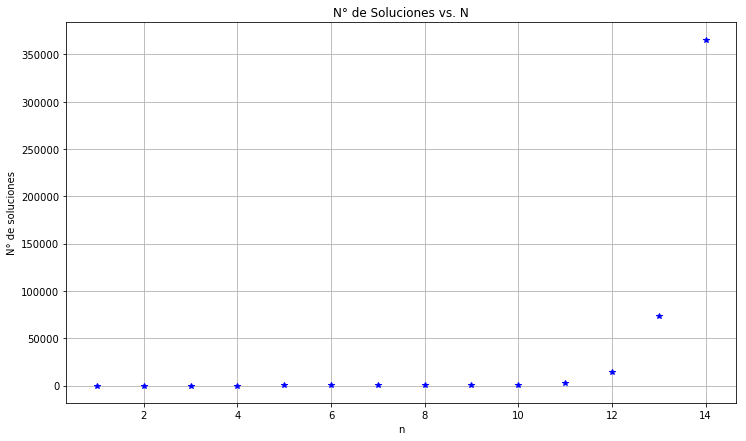

In [8]:
plt.figure(figsize=(12,7))
plt.plot(N, sol, '*b')
plt.grid(True)
plt.xlabel("n")
plt.ylabel("N° de soluciones")
plt.title("N° de Soluciones vs. N")
plt.show()

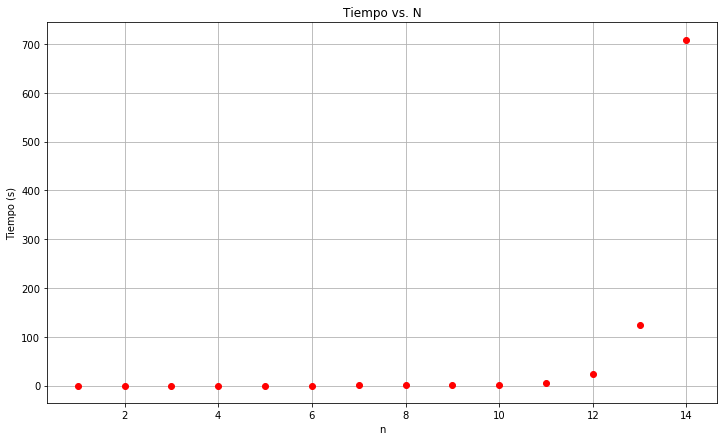

In [10]:
plt.figure(figsize=(12,7))
plt.plot(N, times, 'ro')
plt.grid(True)
plt.xlabel("n")
plt.ylabel("Tiempo (s)")
plt.title("Tiempo vs. N")
plt.show()